# Data Cleaning and EDA

In [83]:
import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt
import seaborn as sns

### Reading in and Merging Data

In [84]:
df1 = pd.read_csv('recorddata10.csv')
df2 = pd.read_csv('recorddata11.csv')
df3 = pd.read_csv('recorddata12.csv')
df4 = pd.read_csv('recorddata13.csv')
df5 = pd.read_csv('recorddata14.csv')
df6 = pd.read_csv('recorddata15.csv')

In [85]:
df12 = pd.merge(df1, df2, how='outer')
df123 = pd.merge(df12, df3, how='outer')
df1234 = pd.merge(df123, df4, how='outer')
df12345 = pd.merge(df1234, df5, how='outer')
df = pd.merge(df12345, df6, how='outer')

In [86]:
df.sample(5)

,Artist_Album,Genre,Release_Date,Style,Rate_Haves_Wants,Media_Condition,Sleeve_Condition,Seller_Rating,Price
12826,Cornershop – Lessons Learned From Rocky I To R...,Electronic,2002,"Breaks, Big Beat","Rated 4.00 of 4 votes (74 have, 4 want)",Very Good Plus (VG+),Sleeve: Very Good Plus (VG+),100.0%,$2.00
14351,Harley & Muscle Feat. Gerideau – Must Be The M...,Electronic,2002,"House, Disco","Rated 4.09 of 11 votes (67 have, 18 want)",Near Mint (NM or M-),Sleeve: Generic,100.0%,$5.00
19255,East Coast – The Rock,Funk / Soul,1978,Disco,"Rated 4.43 of 14 votes (97 have, 64 want)",Very Good Plus (VG+),Sleeve: Near Mint (NM or M-),97.8%,$11.77
5313,Black Blood (2) – Chicano / A.I.E. (A. Mwana),Funk / Soul,1976,Afrobeat,"No Rating Yet (0 have, 2 want)",Very Good (VG),Sleeve: Generic,99.4%,$30.65
7190,Willie Colón – La Banda / Recomendacion,Latin,NaN,NaN,"No Rating Yet (0 have, 20 want)",Near Mint (NM or M-),Sleeve: Very Good Plus (VG+),100.0%,$149.35


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25758 entries, 0 to 25757
Data columns (total 9 columns):
Artist_Album        25758 non-null object
Genre               25758 non-null object
Release_Date        24158 non-null object
Style               23800 non-null object
Rate_Haves_Wants    25756 non-null object
Media_Condition     25756 non-null object
Sleeve_Condition    25697 non-null object
Seller_Rating       25588 non-null object
Price               25758 non-null object
dtypes: object(9)
memory usage: 2.0+ MB


In [88]:
df.shape

(25758, 9)

### Cleaning Columns

In [89]:
df['Artist'], df['Album'] = df['Artist_Album'].str.split('–', 1).str
df['Release_Date'] = df['Release_Date'].str[-4:]
df['Rating'], df['HavesWants'] = df['Rate_Haves_Wants'].str.split('(', 1).str
df['Haves'], df['Wants'] = df['HavesWants'].str.split(',', 1).str
df['Wants'] = df['Wants'].str[:-1]
df['Sleeve_Condition'] = df['Sleeve_Condition'].str[7:]
df['Price'] = df['Price'].str[1:]
df['Price'] = df['Price'].str.replace(',', '')
df['Seller_Rating'] = df['Seller_Rating'].str[:-1]

In [90]:
del df['Artist_Album']
del df['Style']
del df['Rate_Haves_Wants']
del df['HavesWants']

In [91]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df['Haves'] = df['Haves'].str[:-4]
df['Wants'] = df['Wants'].str[:-4]

In [92]:
noratedf = df[df['Rating'] == 'No Rating Yet']
del noratedf['Rating']

In [94]:
ratedf = df[df['Rating'] != 'No Rating Yet']
ratedf['Rating'] = ratedf['Rating'].str[6:]
ratedf['Rate'], ratedf['Votes'] = ratedf['Rating'].str.split('of', 1).str
ratedf['Votes'] = ratedf['Votes'].str[:-5]
del ratedf['Rating']

In [95]:
ratedf.head()

,Genre,Release_Date,Media_Condition,Sleeve_Condition,Seller_Rating,Price,Artist,Album,Haves,Wants,Rate,Votes
0,"Folk, World, & Country",1984,Very Good (VG),Very Good (VG),96.8,3.45,Leon Russell,Hank Wilson Vol. II,14,5,4.00,3
1,"Folk, World, & Country",1984,Very Good (VG),Very Good (VG),96.8,3.45,Leon Russell,Hank Wilson Vol. II,14,5,4.00,3
2,"Jazz, Funk / Soul",1974,Near Mint (NM or M-),Generic,100.0,24.00,Idris Muhammad,Power Of Soul,93,268,4.77,13
3,"Rock, Funk / Soul, Pop",1985,Very Good Plus (VG+),Very Good (VG),100.0,6.00,Prince And The Revolution,Pop Life,476,65,4.34,29
4,"Rock, Funk / Soul, Pop",1985,Very Good Plus (VG+),Very Good (VG),100.0,6.00,Prince And The Revolution,Pop Life,476,65,4.34,29


In [96]:
noratedf.head()

,Genre,Release_Date,Media_Condition,Sleeve_Condition,Seller_Rating,Price,Artist,Album,Haves,Wants
6,Jazz,1958,Near Mint (NM or M-),Very Good (VG),96.8,3.21,The Kai Winding Orchestra,The Swingin' States,20,2
7,Jazz,1958,Near Mint (NM or M-),Very Good (VG),96.8,3.21,The Kai Winding Orchestra,The Swingin' States,20,2
8,Jazz,1958,Near Mint (NM or M-),Very Good (VG),96.8,3.21,The Kai Winding Orchestra,The Swingin' States,20,2
37,"Electronic, Funk / Soul",1986,Very Good Plus (VG+),Very Good (VG),100.0,5.00,New Edition,Once In A Lifetime Groove,55,48
38,"Electronic, Funk / Soul",1986,Very Good Plus (VG+),Very Good (VG),100.0,5.00,New Edition,Once In A Lifetime Groove,55,48


In [97]:
vinylsdf = pd.merge(noratedf, ratedf, how='outer')
vinylsdf.sample(10)

,Genre,Release_Date,Media_Condition,Sleeve_Condition,Seller_Rating,Price,Artist,Album,Haves,Wants,Rate,Votes
132,"Latin, Pop",1968,Good Plus (G+),Generic,99.4,7.07,"Marco Antonio Muñiz, Mario Ruiz Armengol, Chuc...",Llegando A Ti / Cuando Caiga La Tarde,0,0,NaN,NaN
18041,Electronic,2001,Near Mint (NM or M-),Generic,100.0,8.00,Syndicate Of Law,Boys & Girls,5,1,3.00,1
8142,Electronic,2019,Mint (M),Generic,100.0,15.00,Various,Clear Memory 001,3,5,5.00,1
4471,Rock,1961,Very Good Plus (VG+),Very Good Plus (VG+),99.4,76.35,Los Rogers,Noches y Dias Perdidos,4,7,NaN,NaN
19997,Electronic,1998,Near Mint (NM or M-),Not Graded,100.0,2.00,Dealers De Funk,New Jersey,50,13,4.33,3
3159,"Rock, Pop",1979,Very Good Plus (VG+),Generic,99.4,9.43,America (2),Alrededor = All Around / En La Ciudad = High I...,0,0,NaN,NaN
15870,"Electronic, Pop",1982,Near Mint (NM or M-),Near Mint (NM or M-),97.4,18.00,Yazoo,The Other Side Of Love,850,72,3.82,73
15257,Electronic,2001,Near Mint (NM or M-),Generic,99.8,7.00,Various,Dreigang EP,32,12,4.43,7
17039,Electronic,2004,Near Mint (NM or M-),Near Mint (NM or M-),100.0,15.00,DJ Joe K.,Batukada / Sambatukada,56,14,4.27,11
8070,Electronic,2000,Very Good Plus (VG+),Very Good Plus (VG+),99.2,2.00,Natalie Cole,Livin' For Love,32,14,3.00,6


In [98]:
vinylsdf.shape

(25758, 12)

In [99]:
vinylsdf.describe()

,Genre,Release_Date,Media_Condition,Sleeve_Condition,Seller_Rating,Price,Artist,Album,Haves,Wants,Rate,Votes
count,25758,24158,25756,25697,25588,25758,25758,25758,25756,25756,19870,19870
unique,252,70,8,11,37,789,12229,16921,1202,504,240,274
top,Electronic,2001,Very Good Plus (VG+),Generic,100.0,3.00,Various,Cold Fact,0,0,4.00,1
freq,9638,1065,10242,8289,7696,2878,741,34,2821,3175,2229,2344


### Getting rid of duplicates and null values

In [100]:
vinylsdf['Rate'] = vinylsdf['Rate'].fillna(value='No')
vinylsdf['Votes'] = vinylsdf['Votes'].fillna(value='0')

In [101]:
vinylsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25758 entries, 0 to 25757
Data columns (total 12 columns):
Genre               25758 non-null object
Release_Date        24158 non-null object
Media_Condition     25756 non-null object
Sleeve_Condition    25697 non-null object
Seller_Rating       25588 non-null object
Price               25758 non-null object
Artist              25758 non-null object
Album               25758 non-null object
Haves               25756 non-null object
Wants               25756 non-null object
Rate                25758 non-null object
Votes               25758 non-null object
dtypes: object(12)
memory usage: 2.6+ MB


In [102]:
vinylsdf = vinylsdf.drop_duplicates()
vinylsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19878 entries, 0 to 25757
Data columns (total 12 columns):
Genre               19878 non-null object
Release_Date        18887 non-null object
Media_Condition     19877 non-null object
Sleeve_Condition    19825 non-null object
Seller_Rating       19787 non-null object
Price               19878 non-null object
Artist              19878 non-null object
Album               19878 non-null object
Haves               19877 non-null object
Wants               19877 non-null object
Rate                19878 non-null object
Votes               19878 non-null object
dtypes: object(12)
memory usage: 2.0+ MB


In [103]:
vinylsdf = vinylsdf.dropna()

In [104]:
rates = pd.to_numeric(vinylsdf['Rate'][vinylsdf.Rate != 'No'])
mean = rates.mean()
mean

3.9858514595548598

In [105]:
vinylsdf['Rate'] = vinylsdf['Rate'].replace({'No': mean})
vinylsdf['Percent_Seller_Rating'] = (pd.to_numeric(vinylsdf.Seller_Rating))/100
del vinylsdf['Seller_Rating']

In [106]:
vinylsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18749 entries, 0 to 25757
Data columns (total 12 columns):
Genre                    18749 non-null object
Release_Date             18749 non-null object
Media_Condition          18749 non-null object
Sleeve_Condition         18749 non-null object
Price                    18749 non-null object
Artist                   18749 non-null object
Album                    18749 non-null object
Haves                    18749 non-null object
Wants                    18749 non-null object
Rate                     18749 non-null object
Votes                    18749 non-null object
Percent_Seller_Rating    18749 non-null float64
dtypes: float64(1), object(11)
memory usage: 1.9+ MB


In [107]:
vinylsdf['Votes'] = pd.to_numeric(vinylsdf.Votes)
vinylsdf['Haves'] = pd.to_numeric(vinylsdf.Haves)
vinylsdf['Wants'] = pd.to_numeric(vinylsdf.Wants)
vinylsdf['Release_Date'] = pd.to_numeric(vinylsdf.Release_Date)
vinylsdf['Price'] = pd.to_numeric(vinylsdf.Price)
vinylsdf['Rate'] = pd.to_numeric(vinylsdf.Rate)

In [108]:
orderedcols = ['Price', 'Artist', 'Album', 'Genre', 'Release_Date', 'Media_Condition', 'Sleeve_Condition', 
               'Haves', 'Wants', 'Percent_Seller_Rating', 'Rate', 'Votes']
vinylsdf = vinylsdf[orderedcols]

In [109]:
vinylsdf.sample(10)

,Price,Artist,Album,Genre,Release_Date,Media_Condition,Sleeve_Condition,Haves,Wants,Percent_Seller_Rating,Rate,Votes
25145,11.99,Babe Ruth,Babe Ruth,Rock,1975,Very Good Plus (VG+),Very Good (VG),395,52,0.995,3.73,41
24535,1000.00,Bobby Womack,Secrets / If You Think You're Lonely Now,Funk / Soul,1981,Mint (M),Generic,3,59,0.978,5.00,1
17654,4.99,Sheryl Crow,Soak Up The Sun (Victor Calderone & Mac Quayle...,"Electronic, Pop",2002,Near Mint (NM or M-),Generic,59,19,1.000,3.67,6
22146,8.00,Northern Lights Orchestra,Loverboy,Electronic,2000,Mint (M),Generic,62,22,1.000,4.25,4
14010,5.00,Joel Harrison,El Sonido Loco,"Electronic, Hip Hop",2003,Near Mint (NM or M-),Not Graded,30,22,1.000,3.00,3
18224,5.00,Progress Funk,Around My Brain,Electronic,1997,Very Good (VG),Good Plus (G+),104,10,1.000,3.75,16
24445,18.00,Jennifer Warnes,Jennifer Warnes,"Rock, Pop",1976,Very Good Plus (VG+),Good Plus (G+),608,27,0.998,3.70,44
20368,3.50,Surreal Madrid,Freaky People,Electronic,1999,Very Good Plus (VG+),Not Graded,55,11,1.000,3.89,9
21909,7.77,Judy Cheeks,As Long As You're Good To Me,Electronic,1995,Near Mint (NM or M-),Near Mint (NM or M-),45,10,0.978,4.20,10
23608,4.00,Recruitz,Edge / Flash Katz,Electronic,1998,Near Mint (NM or M-),Not Graded,84,21,1.000,3.78,9


In [110]:
vinylsdf['Media_Condition'].value_counts()

Very Good Plus (VG+)    7112
Near Mint (NM or M-)    5995
Mint (M)                3492
Very Good (VG)          1609
Good Plus (G+)           256
Good (G)                 174
Poor (P)                  71
Fair (F)                  40
Name: Media_Condition, dtype: int64

In [111]:
vinylsdf['Sleeve_Condition'].value_counts()

Generic                 5251
Not Graded              3213
Very Good Plus (VG+)    3189
Near Mint (NM or M-)    2949
Mint (M)                2050
Very Good (VG)          1506
Good Plus (G+)           269
Good (G)                 139
No Cover                 120
Fair (F)                  44
Poor (P)                  19
Name: Sleeve_Condition, dtype: int64

In [112]:
vinylsdf['Media_Condition'] = vinylsdf['Media_Condition'].replace({'Mint (M)': 8})
vinylsdf['Media_Condition'] = vinylsdf['Media_Condition'].replace({'Near Mint (NM or M-)': 7})
vinylsdf['Media_Condition'] = vinylsdf['Media_Condition'].replace({'Very Good Plus (VG+)': 6})
vinylsdf['Media_Condition'] = vinylsdf['Media_Condition'].replace({'Very Good (VG)': 5})
vinylsdf['Media_Condition'] = vinylsdf['Media_Condition'].replace({'Good Plus (G+)': 4})
vinylsdf['Media_Condition'] = vinylsdf['Media_Condition'].replace({'Good (G)': 3})
vinylsdf['Media_Condition'] = vinylsdf['Media_Condition'].replace({'Fair (F)': 2})
vinylsdf['Media_Condition'] = vinylsdf['Media_Condition'].replace({'Poor (P)': 1})

In [113]:
vinylsdf['Sleeve_Condition'] = vinylsdf['Sleeve_Condition'].replace({'Mint (M)': 11})
vinylsdf['Sleeve_Condition'] = vinylsdf['Sleeve_Condition'].replace({'Near Mint (NM or M-)': 10})
vinylsdf['Sleeve_Condition'] = vinylsdf['Sleeve_Condition'].replace({'Very Good Plus (VG+)': 9})
vinylsdf['Sleeve_Condition'] = vinylsdf['Sleeve_Condition'].replace({'Very Good (VG)': 8})
vinylsdf['Sleeve_Condition'] = vinylsdf['Sleeve_Condition'].replace({'Good Plus (G+)': 7})
vinylsdf['Sleeve_Condition'] = vinylsdf['Sleeve_Condition'].replace({'Good (G)': 6})
vinylsdf['Sleeve_Condition'] = vinylsdf['Sleeve_Condition'].replace({'Fair (F)': 5})
vinylsdf['Sleeve_Condition'] = vinylsdf['Sleeve_Condition'].replace({'Poor (P)': 4})
vinylsdf['Sleeve_Condition'] = vinylsdf['Sleeve_Condition'].replace({'Generic': 3})
vinylsdf['Sleeve_Condition'] = vinylsdf['Sleeve_Condition'].replace({'Not Graded': 2})
vinylsdf['Sleeve_Condition'] = vinylsdf['Sleeve_Condition'].replace({'No Cover': 1})

In [114]:
vinylsdf.sample(10)

,Price,Artist,Album,Genre,Release_Date,Media_Condition,Sleeve_Condition,Haves,Wants,Percent_Seller_Rating,Rate,Votes
5835,7.99,Malik Yousef*,Malik Yousef Presents The Great Chicago Fire ...,Hip Hop,2003,7,3,14,5,0.978,3.985851,0
24367,4.50,Jin,"Learn Chinese (DJ Hype, J Majik & Wikkerman Re...",Electronic,2005,8,3,35,9,1.000,4.000000,7
10406,3.00,Commodores,Thumpin' Music / Just To Be Close To You,Funk / Soul,1976,6,3,115,12,0.997,3.500000,2
3435,6.86,Alvaro Zermeño* Y Mariachi Tenochtitlán De Her...,Voy / Tan Cerquita De Ti,"Latin, Folk, World, & Country",1964,6,2,0,1,0.994,3.985851,0
13305,4.00,De'Lacy,All I Need Is Love,Electronic,1998,7,3,13,6,1.000,5.000000,1
20007,4.00,Space Penguins,The Electrofunk,Electronic,2003,7,2,28,6,1.000,4.000000,2
15700,9.77,The Cookie Crew,Females (Get On Up),Hip Hop,1987,8,11,108,10,0.978,4.330000,15
7895,150.00,Benny Rose,It's Only You,"Electronic, Funk / Soul",1984,5,3,52,408,0.997,4.460000,39
18715,20.00,Diana Ross,Swept Away,"Electronic, Funk / Soul",1984,7,10,932,89,0.974,3.860000,70
25030,6.77,Grace Jones,Amado Mio / Crack Attack,Electronic,1990,8,3,151,29,0.978,4.070000,15


In [115]:
vinyls = pd.concat([vinylsdf, vinylsdf['Genre'].str.get_dummies(sep=',')], axis=1)

In [116]:
vinyls.shape

(18749, 43)

In [117]:
vinyls.columns

Index(['Price', 'Artist', 'Album', 'Genre', 'Release_Date', 'Media_Condition',
       'Sleeve_Condition', 'Haves', 'Wants', 'Percent_Seller_Rating', 'Rate',
       'Votes', ' & Country', ' Blues', ' Brass & Military', ' Children's',
       ' Classical', ' Folk', ' Funk / Soul', ' Hip Hop', ' Jazz', ' Latin',
       ' Non-Music', ' Pop', ' Reggae', ' Rock', ' Stage & Screen', ' World',
       'Blues', 'Brass & Military', 'Children's', 'Classical', 'Electronic',
       'Folk', 'Funk / Soul', 'Hip Hop', 'Jazz', 'Latin', 'Non-Music', 'Pop',
       'Reggae', 'Rock', 'Stage & Screen'],
      dtype='object')

In [118]:
vinyls['Childrens'] = vinyls[" Children's"] + vinyls["Children's"]
vinyls['Funk/Soul'] = vinyls[' Funk / Soul'] + vinyls['Funk / Soul']
vinyls['Blues'] = vinyls['Blues'] + vinyls[' Blues']
vinyls['Brass & Military'] = vinyls['Brass & Military'] + vinyls[' Brass & Military']
vinyls['Classical'] = vinyls['Classical'] + vinyls[' Classical']
vinyls['Folk'] = vinyls['Folk'] + vinyls[' Folk']
vinyls['Hip Hop'] = vinyls['Hip Hop'] + vinyls[' Hip Hop']
vinyls['Jazz'] = vinyls['Jazz'] + vinyls[' Jazz']
vinyls['Latin'] = vinyls['Latin'] + vinyls[' Latin']
vinyls['Pop'] = vinyls['Pop'] + vinyls[' Pop']
vinyls['Reggae'] = vinyls['Reggae'] + vinyls[' Reggae']
vinyls['Rock'] = vinyls['Rock'] + vinyls[' Rock']
vinyls['Stage & Screen'] = vinyls['Stage & Screen'] + vinyls[' Stage & Screen']
vinyls['Country'] = vinyls[' & Country']

In [119]:
del vinyls['Genre']
del vinyls[' & Country']
del vinyls['Non-Music']
del vinyls[' Non-Music']
del vinyls[" Children's"]
del vinyls["Children's"]
del vinyls[' Funk / Soul']
del vinyls['Funk / Soul']
del vinyls[' Blues']
del vinyls[' Brass & Military']
del vinyls[' Classical']
del vinyls[' Folk']
del vinyls[' Hip Hop']
del vinyls[' Jazz']
del vinyls[' Latin']
del vinyls[' Pop']
del vinyls[' Reggae']
del vinyls[' Rock']
del vinyls[' Stage & Screen']

In [120]:
vinyls.columns = vinyls.columns.str.strip()
vinyls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18749 entries, 0 to 25757
Data columns (total 27 columns):
Price                    18749 non-null float64
Artist                   18749 non-null object
Album                    18749 non-null object
Release_Date             18749 non-null int64
Media_Condition          18749 non-null int64
Sleeve_Condition         18749 non-null int64
Haves                    18749 non-null int64
Wants                    18749 non-null int64
Percent_Seller_Rating    18749 non-null float64
Rate                     18749 non-null float64
Votes                    18749 non-null int64
World                    18749 non-null int64
Blues                    18749 non-null int64
Brass & Military         18749 non-null int64
Classical                18749 non-null int64
Electronic               18749 non-null int64
Folk                     18749 non-null int64
Hip Hop                  18749 non-null int64
Jazz                     18749 non-null int64
Latin    

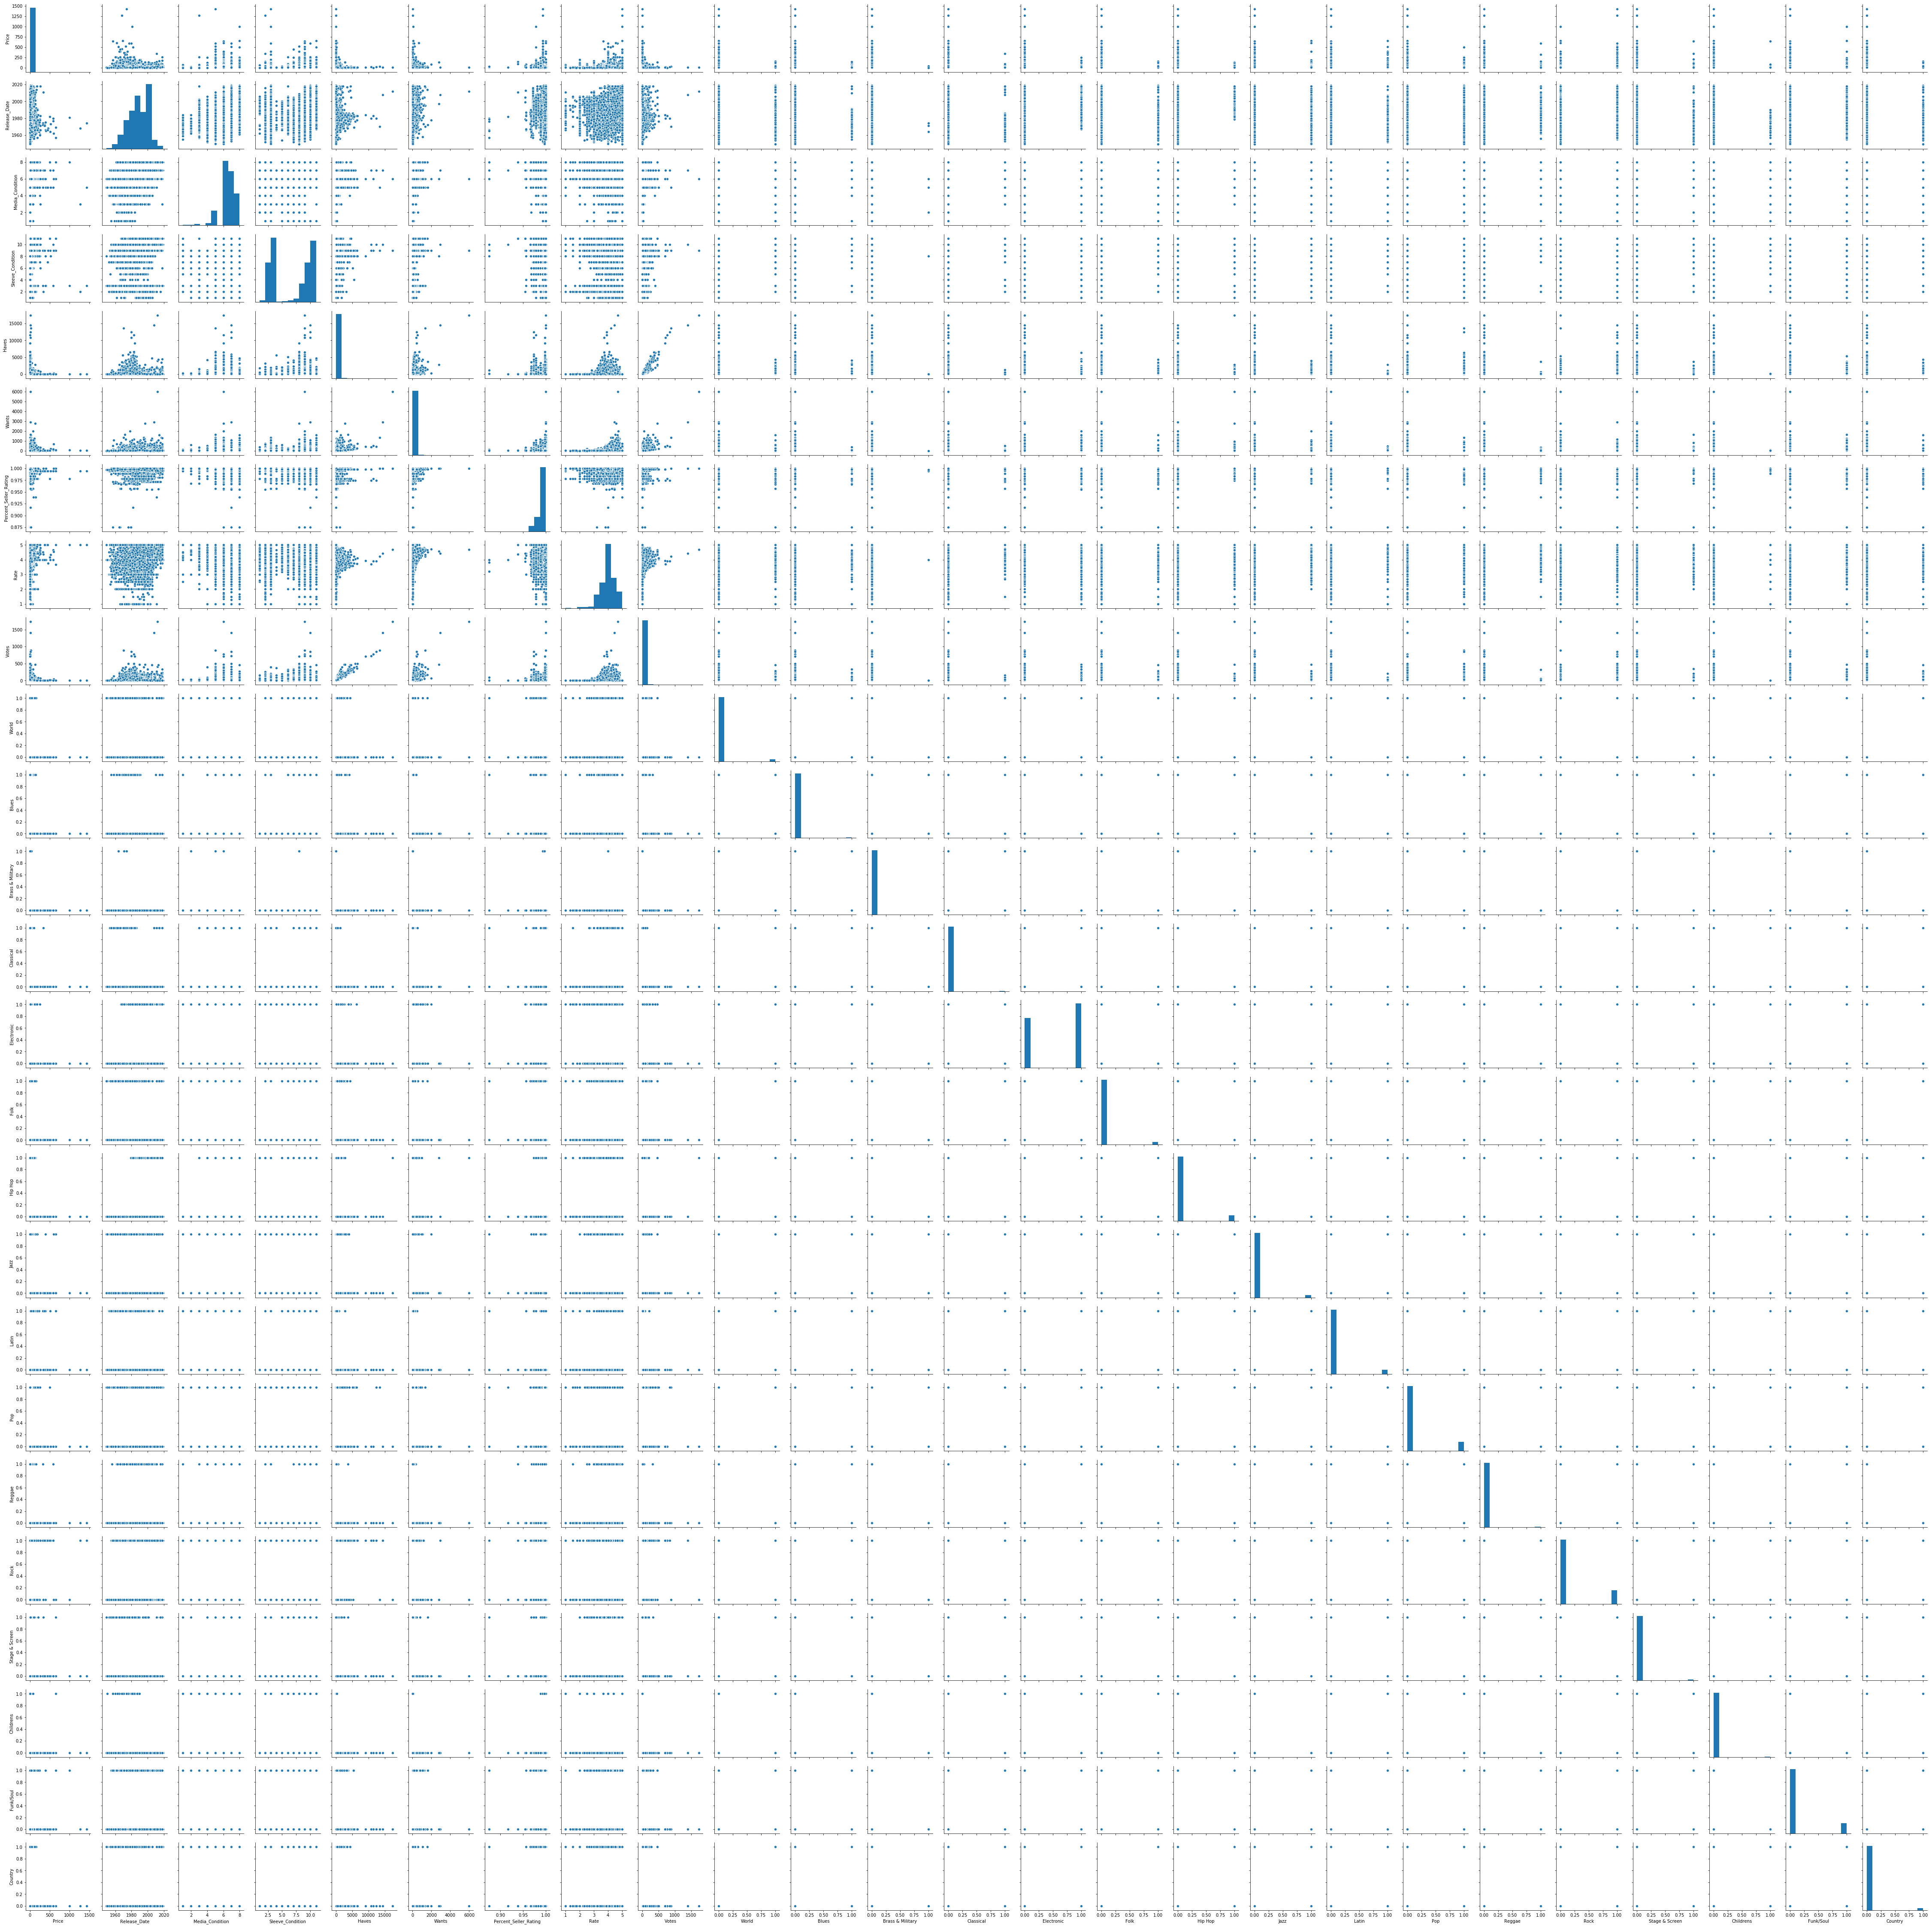

In [156]:
sns.pairplot(vinyls)

In [121]:
corr = vinyls.corr()
corr

,Price,Release_Date,Media_Condition,Sleeve_Condition,Haves,Wants,Percent_Seller_Rating,Rate,Votes,World,...,Hip Hop,Jazz,Latin,Pop,Reggae,Rock,Stage & Screen,Childrens,Funk/Soul,Country
Price,1.000000,-0.206181,0.011647,0.155946,-0.020147,0.127988,-0.084094,0.150551,-0.015568,-0.017877,...,-0.028625,0.045801,0.095583,0.036857,0.043202,0.222513,0.043548,0.025145,0.029608,-0.017877
Release_Date,-0.206181,1.000000,0.380601,-0.040277,-0.055082,0.018382,0.150871,-0.050124,0.019807,-0.198537,...,0.160050,-0.199794,-0.297091,-0.337553,0.007882,-0.328635,-0.133132,-0.044890,-0.223850,-0.198537
Media_Condition,0.011647,0.380601,1.000000,0.323894,-0.024540,0.013037,-0.317788,-0.008217,0.007834,-0.104400,...,0.135430,-0.056834,-0.228113,-0.193431,-0.010203,-0.174723,-0.043630,-0.055635,-0.023798,-0.104400
Sleeve_Condition,0.155946,-0.040277,0.323894,1.000000,0.122855,0.130234,-0.383238,0.075764,0.130888,-0.032908,...,0.086376,0.081303,-0.066851,-0.021607,0.011102,0.083665,0.038793,-0.000759,0.068849,-0.032908
Haves,-0.020147,-0.055082,-0.024540,0.122855,1.000000,0.519238,-0.049874,-0.004073,0.939689,-0.005023,...,-0.012384,0.026849,-0.077911,0.010013,-0.007955,0.167372,0.008569,-0.014187,0.034007,-0.005023
Wants,0.127988,0.018382,0.013037,0.130234,0.519238,1.000000,-0.079574,0.154956,0.673098,-0.035879,...,0.022515,0.022599,-0.090031,-0.073610,-0.003516,0.036816,0.005616,-0.014715,0.066123,-0.035879
Percent_Seller_Rating,-0.084094,0.150871,-0.317788,-0.383238,-0.049874,-0.079574,1.000000,-0.085356,-0.069753,0.054796,...,-0.134066,0.038713,0.035845,0.008368,-0.008868,0.037039,0.005732,0.012123,-0.189026,0.054796
Rate,0.150551,-0.050124,-0.008217,0.075764,-0.004073,0.154956,-0.085356,1.000000,0.038276,-0.019236,...,-0.010985,0.037993,0.049140,0.002693,0.011818,0.025964,0.001470,-0.020142,0.070786,-0.019236
Votes,-0.015568,0.019807,0.007834,0.130888,0.939689,0.673098,-0.069753,0.038276,1.000000,-0.034146,...,-0.013974,0.004327,-0.103280,-0.041894,-0.012484,0.099961,-0.009778,-0.019509,0.017605,-0.034146
World,-0.017877,-0.198537,-0.104400,-0.032908,-0.005023,-0.035879,0.054796,-0.019236,-0.034146,1.000000,...,-0.054330,0.004742,0.063797,0.052479,-0.014430,0.000269,0.021364,0.026831,-0.051927,1.000000


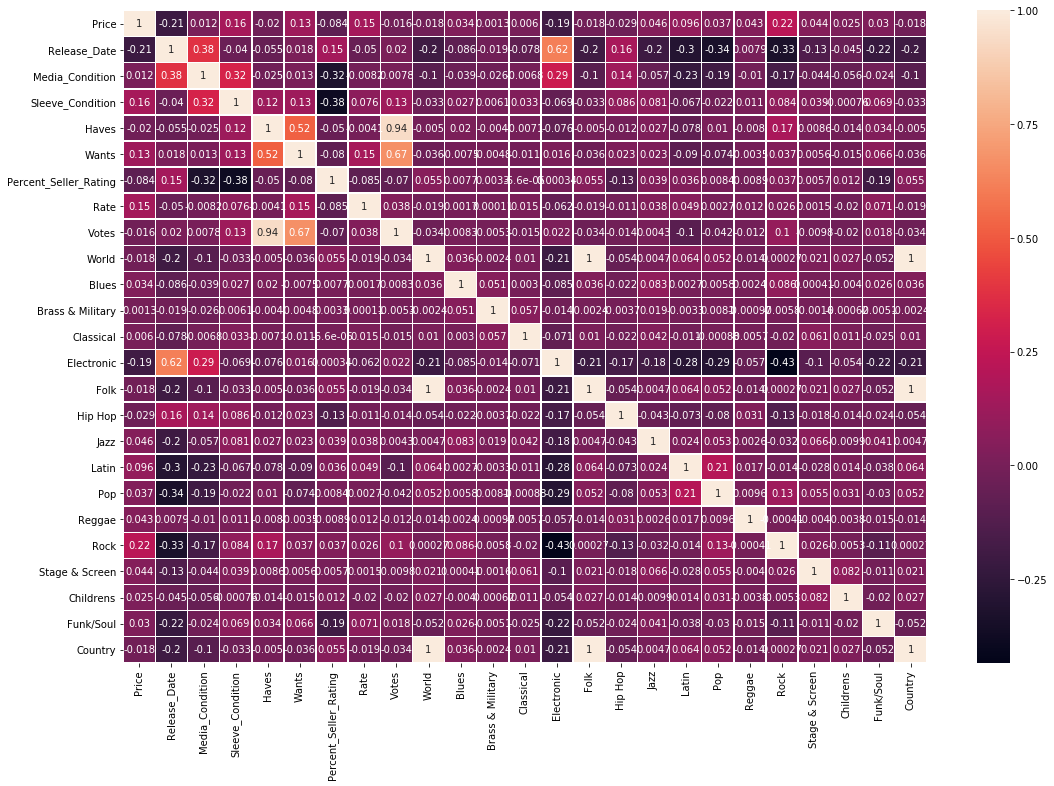

In [122]:
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

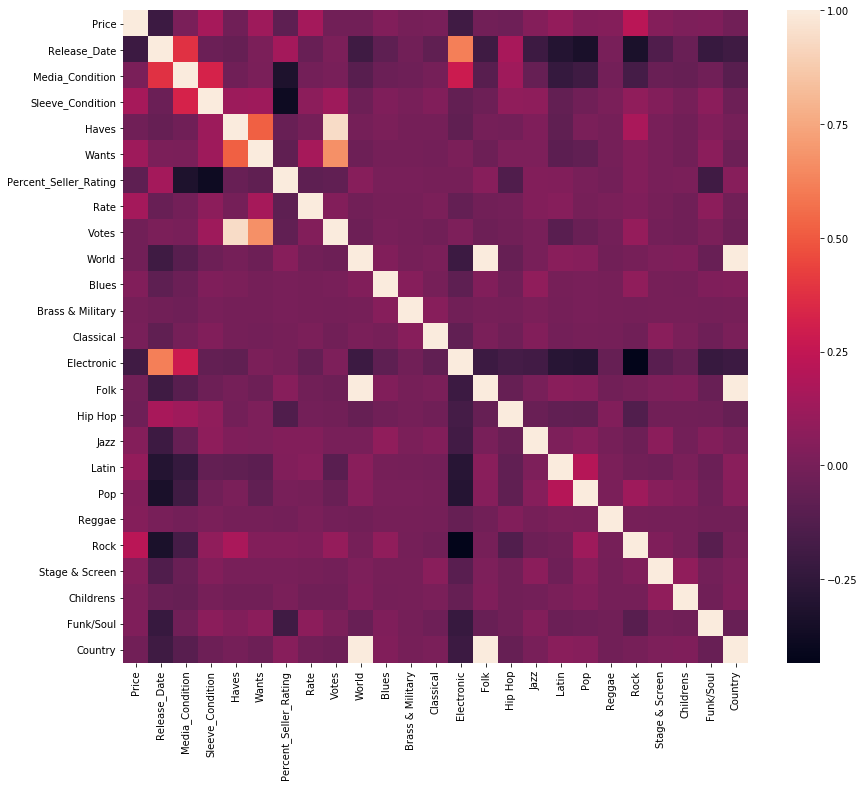

In [123]:
plt.figure(figsize=(14,12))
sns.heatmap(corr)

In [124]:
vinyls['Folk/Country/World'] = vinyls['Country']
del vinyls['Folk']
del vinyls['World']
del vinyls['Country']

In [125]:
vinyls.Haves.corr(vinyls.Votes)

0.9396892528249657

In [126]:
vinyls.to_pickle("./vinylsdf.pkl")

In [127]:
vin = vinyls[vinyls.Haves != 0]
vin = vin[vin.Wants != 0]
vin = vin[vin.Haves < 7500]

In [128]:
vin.shape

(16851, 25)

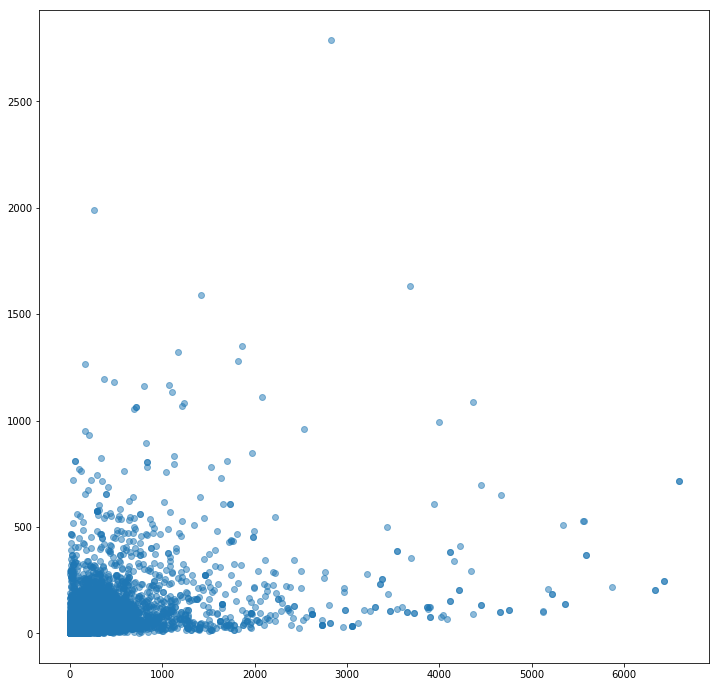

In [129]:
plt.figure(figsize=(12,12))
plt.scatter(vin.Haves, vin.Wants, alpha=.5)